<a href="https://colab.research.google.com/github/ADv0rnik/Data-analysis-for-JER/blob/main/Area_of_research_map.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Creating a map of the research area**

In [2]:
pip install geopandas

     |████████████████████████████████| 994 kB 5.3 MB/s 
     |████████████████████████████████| 6.6 MB 36.3 MB/s 
     |████████████████████████████████| 15.4 MB 36 kB/s 


In [112]:
pip install contextily

     |████████████████████████████████| 19.3 MB 1.2 MB/s 


In [4]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import geopandas as gpd

In [113]:
import contextily as ctx

In [169]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

# *Work with geoDataFrame*
Документация по [geopandas](https://geopandas.org/docs.html)

In [149]:
path = '/content/drive/MyDrive/Colab Notebooks/Data for JER/Gomel_distr/Gomel_districts.shp' 
gomel = gpd.read_file(path)
gomel = gomel.to_crs(epsg=3857)
gomel

,ID_0,ISO,NAME_0,ID_1,NAME_1,ID_2,NAME_2,TYPE_2,ENGTYPE_2,NL_NAME_2,VARNAME_2,Rad,geometry
0,22,BLR,Belarus,2,Homyel',17,Aktsyabar,Raion,District,None,Oktyabrski,10,"POLYGON ((3167705.449 6899649.390, 3167705.449..."
1,22,BLR,Belarus,2,Homyel',18,Brahin,Raion,District,None,None,1480,"POLYGON ((3403743.630 6747844.076, 3402871.823..."
2,22,BLR,Belarus,2,Homyel',19,Buda-Kashalyowa,Raion,District,None,Buda-Koshelevo,185,"POLYGON ((3369725.543 6904534.867, 3370288.204..."
3,22,BLR,Belarus,2,Homyel',20,Chachersk,Raion,District,None,Chechersk,555,"POLYGON ((3467256.218 7008020.133, 3468723.809..."
4,22,BLR,Belarus,2,Homyel',21,Dobrush,Raion,District,None,None,555,"POLYGON ((3514231.231 6915488.741, 3514573.924..."
5,22,BLR,Belarus,2,Homyel',22,Homyel',Raion,District,None,Homyel,37,"POLYGON ((3493105.098 6821950.158, 3493015.284..."
6,22,BLR,Belarus,2,Homyel',23,Kalinkavichy,Raion,District,None,Kalinkovichi,185,"POLYGON ((3325703.759 6873590.176, 3326679.393..."
7,22,BLR,Belarus,2,Homyel',24,Karma,Raion,District,None,Korma,555,"POLYGON ((3417648.587 7029741.223, 3417648.587..."
8,22,BLR,Belarus,2,Homyel',25,Khoyniki,Raion,District,None,Khoiniki,1480,"POLYGON ((3358858.745 6714645.411, 3358727.528..."
9,22,BLR,Belarus,2,Homyel',26,Loyew,Raion,District,None,Loev,185,"POLYGON ((3444535.524 6813344.887, 3444759.102..."


In [150]:
gomel1 = gomel.drop('NL_NAME_2', axis = 1)
gomel1.cx[:, :5] #indexer to select by intersection with bounding box

,ID_0,ISO,NAME_0,ID_1,NAME_1,ID_2,NAME_2,TYPE_2,ENGTYPE_2,VARNAME_2,Rad,geometry
1,22,BLR,Belarus,2,Homyel',18,Brahin,Raion,District,None,1480,"POLYGON ((3403743.630 6747844.076, 3402871.823..."


In [151]:
gomel1['Rad'] = gomel1.Rad.apply(lambda i : 2500 if i == 1480 else i)
#gomel1.loc[1,'Rad'] = 2500 - замена в одной отдельной ячейке
gomel1.loc[12,'Rad'] = 1480
gomel1.loc[18,'Rad'] = 555
gomel1.loc[20,'Rad'] = 185
gomel1.loc[11,'Rad'] = 37
gomel1.loc[16,'Rad'] = 37
gomel1.loc[15,'Rad'] = 185
gomel1.loc[5,'Rad'] = 185
gomel1.loc[17,'Rad'] = 1480
gomel1.loc[3,'Rad'] = 1480
gomel1.loc[2,'Rad'] = 555
gomel1

,ID_0,ISO,NAME_0,ID_1,NAME_1,ID_2,NAME_2,TYPE_2,ENGTYPE_2,VARNAME_2,Rad,geometry
0,22,BLR,Belarus,2,Homyel',17,Aktsyabar,Raion,District,Oktyabrski,10,"POLYGON ((3167705.449 6899649.390, 3167705.449..."
1,22,BLR,Belarus,2,Homyel',18,Brahin,Raion,District,None,2500,"POLYGON ((3403743.630 6747844.076, 3402871.823..."
2,22,BLR,Belarus,2,Homyel',19,Buda-Kashalyowa,Raion,District,Buda-Koshelevo,555,"POLYGON ((3369725.543 6904534.867, 3370288.204..."
3,22,BLR,Belarus,2,Homyel',20,Chachersk,Raion,District,Chechersk,1480,"POLYGON ((3467256.218 7008020.133, 3468723.809..."
4,22,BLR,Belarus,2,Homyel',21,Dobrush,Raion,District,None,555,"POLYGON ((3514231.231 6915488.741, 3514573.924..."
5,22,BLR,Belarus,2,Homyel',22,Homyel',Raion,District,Homyel,185,"POLYGON ((3493105.098 6821950.158, 3493015.284..."
6,22,BLR,Belarus,2,Homyel',23,Kalinkavichy,Raion,District,Kalinkovichi,185,"POLYGON ((3325703.759 6873590.176, 3326679.393..."
7,22,BLR,Belarus,2,Homyel',24,Karma,Raion,District,Korma,555,"POLYGON ((3417648.587 7029741.223, 3417648.587..."
8,22,BLR,Belarus,2,Homyel',25,Khoyniki,Raion,District,Khoiniki,2500,"POLYGON ((3358858.745 6714645.411, 3358727.528..."
9,22,BLR,Belarus,2,Homyel',26,Loyew,Raion,District,Loev,185,"POLYGON ((3444535.524 6813344.887, 3444759.102..."


# *Work with map plots*
Usefull links:

http://www.geraintianpalmer.org.uk/2017/09/22/plotting-geopandas/
https://geopandas.org/gallery/plotting_basemap_background.html
https://ramiro.org/notebook/geopandas-choropleth/
https://gisgeography.com/choropleth-maps-data-classification/
https://coderzcolumn.com/tutorials/data-science/plotting-static-maps-with-geopandas-working-with-geospatial-data

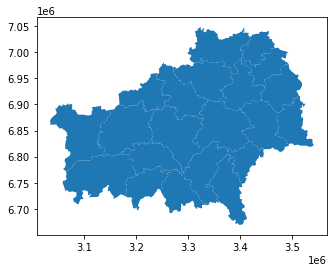

In [6]:
gomel.plot()

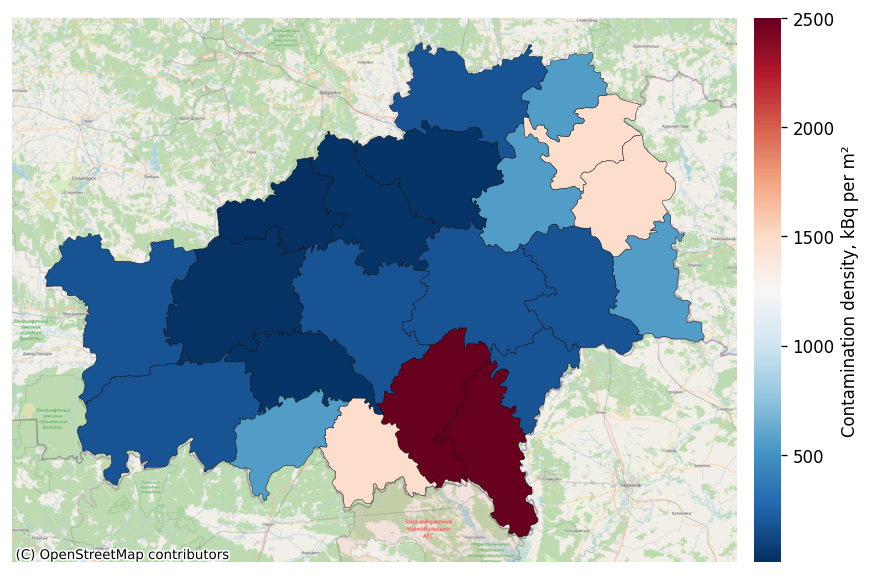

In [180]:
s = "%s²" % 'm'
cmap = 'RdBu_r'
fig, ax = plt.subplots(1, figsize = (18, 6), dpi = 120)
gomel1.plot(column = 'Rad',
            edgecolor = 'black',
            linewidth=0.25,
            #legend=True,
            #legend_kwds={
            #    "label":'Contamination density, kBq per ' + s,          
            #    },           
            #alpha = 0.75,
            cmap=cmap,
            ax = ax) 
vmin = gomel1['Rad'].min()
vmax = gomel1['Rad'].max()

sm = plt.cm.ScalarMappable(cmap = 'RdBu_r',
                                    norm = plt.Normalize(vmin=vmin, vmax=vmax))
cb = fig.colorbar(sm, pad = 0.01)
cb.set_label('Contamination density, kBq per ' + s)
cb.outline.set_visible(False)
ax.axis('off')  
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik) 
#plt.savefig('/content/drive/MyDrive/Colab Notebooks/Data for JER/fig4.png' ,dpi=1000, bbox_inches='tight')

In [ ]:
s = "%s²" % 'm'
cmap = 'RdBu_r'
fig, ax = plt.subplots(1, figsize = (18, 6), dpi = 120)
gomel1.plot(column = 'Rad',
            edgecolor = 'black',
            linewidth=0.25,
            #legend=True,
            #legend_kwds={
            #    "label":'Contamination density, kBq per ' + s,          
            #    },           
            #alpha = 0.75,
            cmap=cmap,
            ax = ax) 
vmin = gomel1['Rad'].min()
vmax = gomel1['Rad'].max()

sm = plt.cm.ScalarMappable(cmap = 'RdBu_r',
                                    norm = plt.Normalize(vmin=vmin, vmax=vmax))
cb = fig.colorbar(sm, pad = 0.01)
cb.set_label('Contamination density, kBq per ' + s)
cb.outline.set_visible(False)
ax.axis('off')  
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)